<a href="https://colab.research.google.com/github/albertofernandezvillan/computer-vision-and-deep-learning-course/blob/main/bgr_color_format_opencv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img align="left" style="padding-right:10px;" src ="https://raw.githubusercontent.com/albertofernandezvillan/computer-vision-and-deep-learning-course/main/assets/university_oviedo_logo.png" width=300 px>

This notebook is from the Course "***Computer vision in the new era of Artificial Intelligence and Deep Learning***", or "*Visión por computador en la nueva era de la Inteligencia Artificial y el Deep Learning*" (ES) from the "Second quarter university extension courses" that the University of Oviedo is offering (05/04/2021 - 16/04/2021)

<[Github Repository](https://github.com/albertofernandezvillan/computer-vision-and-deep-learning-course) | [Course Web Page Information](https://www.uniovi.es/estudios/extension/cursos2c/-/asset_publisher/SEp0PJi4ISGo/content/vision-por-computador-en-la-nueva-era-de-la-inteligencia-artificial-y-el-deep-learning?redirect=%2Festudios%2Fextension%2Fcursos2c)>

# Summary

OpenCV uses BGR color format, while other libraries (e.g. PIL, Matplotlib) uses RGB color format. Therefore, in this notebook, we will see different options to convert from BGR color format to RGB color format and viceversa.

# Understanding BGR color format

When reading a color image file, OpenCV `cv2.imread()` method reads the image as a NumPy array `ndarray`. The dimensions (shape) of the loaded image are: (`height`, `width`, `3`). `height` is the number of rows, `width` is the number of columns and `3` is the number of channels, which are in BGR (blue, green, red) order. Let's load an image and show it using `cv2_imshow()` and also using Matplotlib.

In [15]:
!wget https://raw.githubusercontent.com/PacktPublishing/Mastering-OpenCV-4-with-Python/master/Chapter02/01-chapter-content/logo.png -O opencv_logo.png

--2021-03-28 16:55:02--  https://raw.githubusercontent.com/PacktPublishing/Mastering-OpenCV-4-with-Python/master/Chapter02/01-chapter-content/logo.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3348 (3.3K) [image/png]
Saving to: ‘opencv_logo.png’

opencv_logo.png     100%[===================>]   3.27K  --.-KB/s    in 0s      

2021-03-28 16:55:02 (38.1 MB/s) - ‘opencv_logo.png’ saved [3348/3348]



(99, 82, 3)


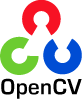

In [16]:
from google.colab.patches import cv2_imshow

# Load the image using cv2.imread() method:
img = cv2.imread("opencv_logo.png")

# Show the image using OpenCV:
cv2_imshow(img)

At this point, we can show the image using Matplotlib. Showing the image with Matplotlib displays the image in wrong color.

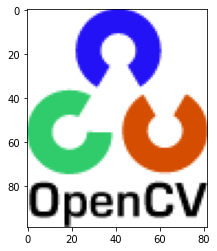

In [17]:
import matplotlib.pyplot as plt

# Show the image using Matplotlib:
plt.imshow(img)

# Converting from BGR to RGB

To convert the image from BGR to RGB we have several option. We can make use of: 
- `cv2.cvtColor()` method to convert the image from BGR to RGB
- List slicing to change (reverse) the channels of the image

## `cv2.cvtColor()` method to convert the image from BGR to RGB

In [18]:
# Converting the loaded image (BGR format) to RGB:
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

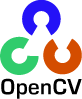

In [19]:
# Show the image using OpenCV:
cv2_imshow(img_rgb)

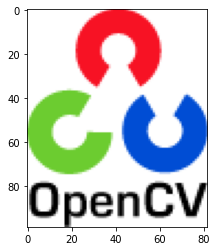

In [20]:
# Show the image using Matplotlib:
plt.imshow(img_rgb)

As you can see by using `cv2.cvtColor(img, cv2.COLOR_BGR2RGB)` we can convert the image for proper visualization with Matplotlib. 

In a similar way, if the image is in RGB order (for example if you are working with PIL this is the color format that this library uses), you can convert it to the OpenCV format using `cv2.cvtColor(img_rgb, cv2.COLOR_RGB2BGR)`.

## List slicing to change (reverse) the channels of the image

In this section we will see why the slice notation `list[::-1]` with default `start` and `stop` indices and negative step size `-1` reverses a given list. 

We know that using slicing notation `s[start:stop:step]` we access every `step-th` element starting from index `start` (included) and ending in index `stop` (excluded). All three arguments are optional, so you can skip them to use the default values `(start=0`, `stop=len(lst)`, `step=1`).

We can use a negative step size (e.g., `-1`) to slice from the right to the left in inverse order.

In [21]:
a = [1,2,3,4,5,6,7,8,9,10]
print(a[::-1])

[10, 9, 8, 7, 6, 5, 4, 3, 2, 1]


Therefore, reversing `BGR` channels will give as `RGB`. It is like swapping `B` and `R` channels because the `G` channel is in the middle and its position doesn't change. All in all, to convert an image from BGR to RGB using list slicing is shown as follows.

In [24]:
# Swap B and R channels in the BGR image to get a RGB color image:
img_rgb = img[:, :, ::-1]

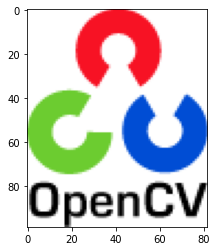

In [25]:
# Show the image using Matplotlib:
plt.imshow(img_rgb)

# Understanding `img[:, :, ::-1]`

To fully understand `img[:, :, ::-1]` we are going to build a very small RGB image and show its content. Then, we are going to convert it to RGB using `img[:, :, ::-1]` and show its content again. 

In this sense, we will load a image and then, resize the image using `cv2.resize()` to create an image with only one row and four columns. Therefore, we are creating a image with a shape of `(1,4,3)` and in BGR color format.

In [37]:
import cv2

# Create an image with shape (1,4,3) in BGR color format:
img = cv2.resize(cv2.imread("opencv_logo.png"), (4,1))

# Print (show) the content (pixel values):
print(img)

[[[ 48 204 108]
  [255 255 255]
  [212  77   0]
  [212  77   0]]]


In [38]:
# Swap B and R channels in the BGR image to get a RGB color image:
img_rgb = img[:, :, ::-1]

# Print (show) the content (pixel values):
print(img_rgb)

[[[108 204  48]
  [255 255 255]
  [  0  77 212]
  [  0  77 212]]]


As you can see comparing the output from the two images, the `R` and `B` channels are swapped. The `G` channel (middle column) has not changed.

# Conclusion

In this notebook, we have explored the BGR color format that OpenCV uses by default in many methods (e.g. `cv2.imread()`). Moreover, we have seen how we can convert an image from BGR color format to RGB color format (and viceversa). This is because other libraries and packages in Python (e.g. PIL, Matplotlib) use RGB color format. Therefore, we have to know how to convert from one color format to another.

